# Explore here

In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv", sep=",")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
x = df[["MedInc", "Latitude", "Longitude"]]
x.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(x, train_size=0.8, random_state = 42)
x_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


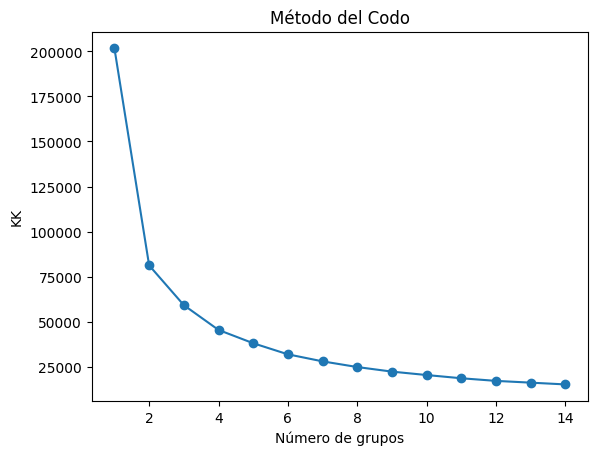

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_train)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

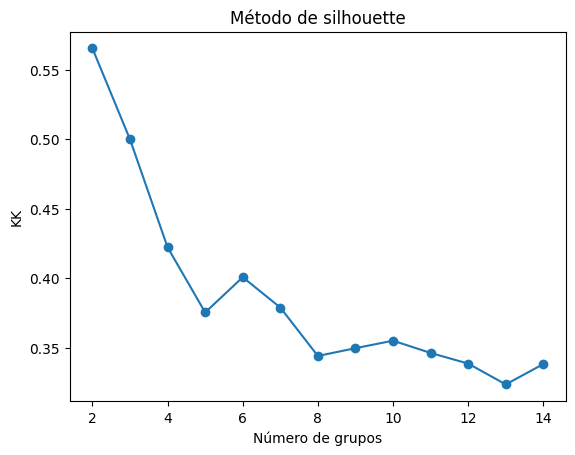

In [6]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x_train)

    predict = kmeans.predict(x_train)
    silhouette_avg = metrics.silhouette_score(x_train, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método de silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

El numero ideal de clusters es 6

In [7]:
ideal_model = KMeans(n_clusters=6, n_init="auto", random_state=42)
ideal_model.fit(x_train)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [8]:
## Clientes
ideal_model.cluster_centers_[:, 0]

array([ 5.37914949,  4.34929638,  6.94251551,  2.42859805, 11.74873415,
        2.73992841])

In [10]:
y_train = list(ideal_model.labels_)
x_train["cluster"] = y_train
x_train.head()


,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [11]:
x_train["cluster"].value_counts(normalize=True)

cluster
3    0.264535
5    0.263808
1    0.230560
0    0.148680
2    0.077519
4    0.014898
Name: proportion, dtype: float64

In [12]:
x_train.groupby("cluster")["MedInc"].mean()

cluster
0     5.380158
1     4.348026
2     6.939476
3     2.428376
4    11.748734
5     2.740572
Name: MedInc, dtype: float64

In [13]:
x_train.groupby("cluster")["MedInc"].std()

cluster
0    1.124744
1    0.631529
2    1.110431
3    0.622707
4    1.908435
5    0.781223
Name: MedInc, dtype: float64

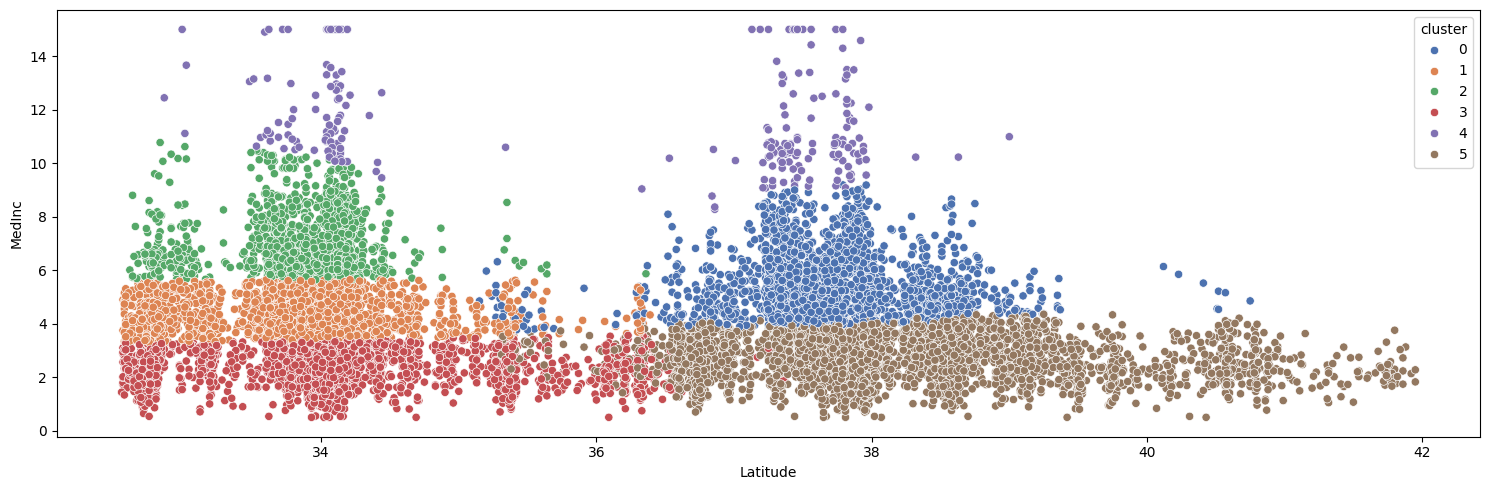

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(15, 5))


sns.scatterplot(ax=ax, data=x_train, x="Latitude", y="MedInc", hue="cluster", palette="deep")

plt.tight_layout()


plt.show()


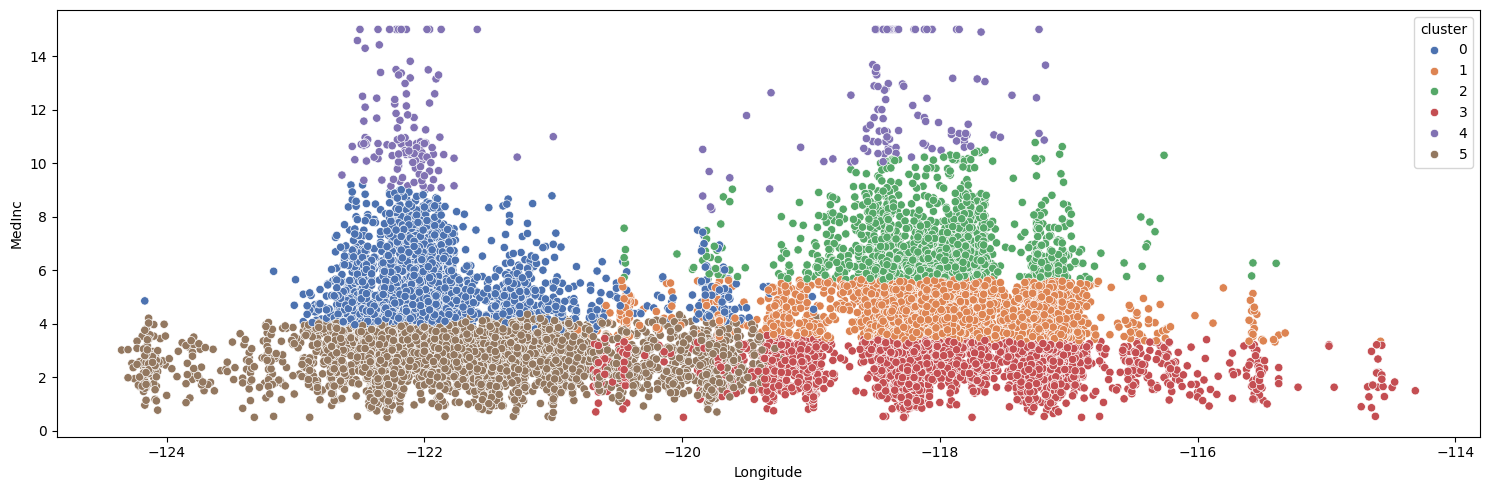

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.scatterplot(ax=ax, data=x_train, x="Longitude", y="MedInc", hue="cluster", palette="deep")

plt.tight_layout()


plt.show()


In [16]:
y_test = ideal_model.predict(x_test)
x_test["cluster"] = y_test

In [ ]:
x_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


In [17]:
x_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


BOOSTING ALGORITHMS

In [19]:
from sklearn.model_selection import train_test_split

num_variables = ["MedInc", "Latitude", "Longitude"]

# Dividimos el conjunto de datos en muestras de train y test
X = x_train.drop("cluster", axis = 1)[num_variables]
y = x_train["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
16490,4.7069,38.00,-120.97
6090,3.8750,34.10,-117.87
10973,2.8828,33.76,-117.85
17287,5.0000,34.35,-119.74
12615,5.0371,38.50,-121.51


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

X_train_norm.head()

,MedInc,Latitude,Longitude
16490,0.443410,1.102818,-0.691554
6090,0.003210,-0.724939,0.854435
10973,-0.521812,-0.884282,0.864409
17287,0.598503,-0.607775,-0.078146
12615,0.618135,1.337146,-0.960856


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,MedInc,Latitude,Longitude
16490,0.290134,0.579340,0.336653
6090,0.232762,0.164004,0.645418
10973,0.164336,0.127796,0.647410
17287,0.310347,0.190628,0.459163
12615,0.312906,0.632588,0.282869


In [22]:
y_train.head()

16490    0
6090     1
10973    3
17287    1
12615    0
Name: cluster, dtype: int32

In [23]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [24]:
y_pred = model.predict(X_test)
y_pred

array([4.999785 , 5.000411 , 0.9967681, ..., 1.0007939, 1.0026213,
       0.998823 ], shape=(3303,), dtype=float32)

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Raíz del Error cuadrático medio: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 0.07310771197080612
Raíz del Error cuadrático medio: 0.2703843781929831
Coeficiente de determinación: 0.9768941402435303


Optimización de hiperparámetros
RandomizedSearchCV

In [26]:
# Importar librerías necesarias
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from xgboost import XGBRegressor

# Definición de los parámetros para la búsqueda aleatoria
xg_rsv = {
    "n_estimators": np.arange(50, 600, 50),
    "max_depth": [None, 3, 5, 10, 15, 20, 50],
    "colsample_bytree": [0.5, 0.7, 1.0],
    "learning_rate": [0.01, 0.1, 0.2, 0.5, 1],
    "gamma": [0, 0.1, 0.4],
    "alpha": [0, 0.1, 1]
}

# Inicializar el modelo para la búsqueda de hiperparámetros
xg_model = RandomizedSearchCV(
    estimator=XGBRegressor(),  
    param_distributions=xg_rsv, 
    scoring="neg_root_mean_squared_error",  
    n_iter=20,  
    cv=5,  
    verbose=True, 
    random_state=42  
)

# Ajustar el modelo
xg_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'alpha': [0, 0.1, ...], 'colsample_bytree': [0.5, 0.7, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.1, ...], ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [27]:
print("Mejores parámetros:", xg_model.best_params_)

Mejores parámetros: {'n_estimators': np.int64(450), 'max_depth': 50, 'learning_rate': 0.5, 'gamma': 0.4, 'colsample_bytree': 1.0, 'alpha': 0}


In [28]:
xgb_ideal_model = XGBRegressor(**xg_model.best_params_)
xgb_ideal_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,1.0
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [29]:
y_pred_rs = xgb_ideal_model.predict(X_test)
y_pred_rs

array([4.9881144, 4.9941683, 1.0061164, ..., 1.0105476, 1.0105476,
       1.0105476], shape=(3303,), dtype=float32)

In [30]:
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_rs))}')
print(f'MSE:{mean_squared_error(y_test, y_pred_rs)}')
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_rs)}")

RMSE:0.2624093807570214
MSE:0.06885868310928345
Coeficiente de determinación: 0.9782370328903198


Grid Search CV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

xg_grid = {
    "n_estimators": (100, 200, 300, 400),
    "max_depth": [3, 4],
    "min_samples_split": (16, 18, 20),
    "min_samples_leaf": (14, 16, 18),
    "max_features": [3, 4, "sqrt", "auto"],
    "learning_rate": [0.05, 0.1], 
    "gamma": [0, 0.1],
    "alpha": [0, 0.1]
}


xg_model = RandomizedSearchCV(
    estimator=XGBRegressor(),
    param_distributions=xg_grid,  
    scoring="neg_root_mean_squared_error",
    n_iter=20,
    cv=5,
    verbose=True,
    random_state=42
)


xg_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/workspaces/No_Supervisado/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/No_Supervisado/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/No_Supervisado/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/No_Supervisado/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:50:20] WARNING: /workspace/src/learner.cc:738: 

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'alpha': [0, 0.1], 'gamma': [0, 0.1], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 4], ...}"
,n_iter,20
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [32]:
print("Mejores parámetros:", xg_model.best_params_)

Mejores parámetros: {'n_estimators': 400, 'min_samples_split': 16, 'min_samples_leaf': 18, 'max_features': 3, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'alpha': 0}


In [33]:
xgb_ideal_model = XGBRegressor(**xg_model.best_params_)
xgb_ideal_model.fit(X_train, y_train)

/workspaces/No_Supervisado/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:51:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [34]:
y_pred_rs = xgb_ideal_model.predict(X_test)
y_pred_rs

array([5.046232  , 5.007315  , 0.9744452 , ..., 0.9801303 , 0.98162717,
       0.9736851 ], shape=(3303,), dtype=float32)

In [35]:
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred_rs))}')
print(f'MSE:{mean_squared_error(y_test, y_pred_rs)}')
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_rs)}")

RMSE:0.2725445335421885
MSE:0.0742805227637291
Coeficiente de determinación: 0.9765234589576721


In [36]:
from joblib import dump, load
dump(model, open("xgboost_default_42.sav", "wb"))